<a href="https://colab.research.google.com/github/M-Raghavi/Data-Science-Projects/blob/main/titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚢 Titanic_Survival_Prediction

# 🔍  Overview of the Dataset:

The Titanic dataset contains information about passengers aboard the Titanic, including details like age, sex, class, fare, and whether they survived the disaster. 🛳️

It’s widely used for learning classification and machine learning techniques, especially for predicting survival (0 = No, 1 = Yes). ✅📉

The dataset includes approximately 891 rows (passengers) and 12 columns (features). Each row represents a single passenger, and each column provides information such as passenger class, gender, age, and more.

📊 Key Columns and Their Meaning:

Column Name	-  Description

PassengerId  -	Unique ID assigned to each passenger

Survived	 -Target variable: 0 = No, 1 = Yes (Did the passenger survive?)

Pclass -	Ticket class: 1 = Upper, 2 = Middle, 3 = Lower

Name	- Full name of the passenger

Sex	 - Gender of the passenger (male, female)

Age	 - Age of the passenger

SibSp	 - Number of siblings or spouses aboard

Parch -	Number of parents or children aboard

Ticket -	Ticket number

Fare	- Passenger fare (how much they paid)

Cabin	- Cabin number (many missing values)

Embarked	- Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton

What it does:

Predicts which passengers survived based on factors like age and class.

🎯Goal:

The goal of Titanic Survival prediction is to build a model that predicts whether a passenger survived based on their travel details.

# 🧾 1. Import Required Libraries

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 📥 2. Load the Titanic Dataset

In [50]:
# Load Titanic dataset
df = pd.read_csv('/content/Titanic-Dataset.csv')
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 🔍 3. Select Input Features and Target Variable

In [51]:
# Choose input features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']
target = 'Survived'
df = df[features + [target]]
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,0
887,1,female,19.0,0,0,30.0000,S,1
888,3,female,NaN,1,2,23.4500,S,0
889,1,male,26.0,0,0,30.0000,C,1


In [52]:
#it will print first five rows
df.head()
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,0
887,1,female,19.0,0,0,30.0000,S,1
888,3,female,NaN,1,2,23.4500,S,0
889,1,male,26.0,0,0,30.0000,C,1


In [53]:
#it will print last five rows
df.tail()
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,0
887,1,female,19.0,0,0,30.0000,S,1
888,3,female,NaN,1,2,23.4500,S,0
889,1,male,26.0,0,0,30.0000,C,1


In [54]:
#Dimensions of the dataset
df.shape
print(df)

     Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Survived
0         3    male  22.0      1      0   7.2500        S         0
1         1  female  38.0      1      0  71.2833        C         1
2         3  female  26.0      0      0   7.9250        S         1
3         1  female  35.0      1      0  53.1000        S         1
4         3    male  35.0      0      0   8.0500        S         0
..      ...     ...   ...    ...    ...      ...      ...       ...
886       2    male  27.0      0      0  13.0000        S         0
887       1  female  19.0      0      0  30.0000        S         1
888       3  female   NaN      1      2  23.4500        S         0
889       1    male  26.0      0      0  30.0000        C         1
890       3    male  32.0      0      0   7.7500        Q         0

[891 rows x 8 columns]


In [55]:
#survival count
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [56]:
#Description about dataset
df.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


# 📊 4. Visualize Correlations with Heatmap

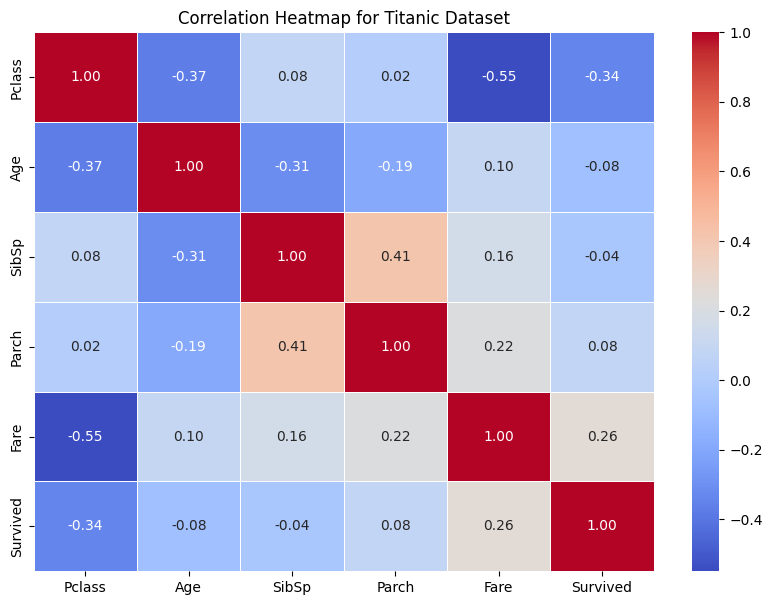

In [57]:
# Select numerical columns for the heatmap
numerical_df = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
# Calculate the correlation matrix
corr = numerical_df.corr()
# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Heatmap for Titanic Dataset')
plt.show()

# 5. Handle Missing Values

In [58]:
# 1. Handle missing values
df.loc[:, 'Age'] = df['Age'].fillna(df['Age'].median())  # Fill missing 'Age' with median
df.loc[:, 'Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # Fill missing 'Embarked' with mode

# 🔁 6. Encode Categorical Variables

In [59]:
# 2. Encode categorical columns using LabelEncoder
labelencoder = LabelEncoder()
# 'Sex' column: Male -> 1, Female -> 0
df.loc[:, 'Sex'] = labelencoder.fit_transform(df['Sex'])
# 'Embarked' column: C -> 0, Q -> 1, S -> 2
df.loc[:, 'Embarked'] = labelencoder.fit_transform(df['Embarked'])

#7. Split Dataset into Train and Test

In [60]:
# Split into features (X) and target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

In [61]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🤖 8. Train Logistic Regression Model



In [62]:
logistic_regression=LogisticRegression()
logistic_regression.fit(X_train,y_train)

LogisticRegression()

# 📈 9. Predict and Evaluate

In [63]:
#Make predictions on the test set
y_pred = logistic_regression.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [64]:
# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [65]:
# Output the results
print("Model Accuracy:", accuracy)
classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)

Model Accuracy: 0.8100558659217877
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



# Confusion Matrix

In [66]:
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[90 15]
 [19 55]]


# 📊 Data visualization

# Bar Plot – Survival by Gender




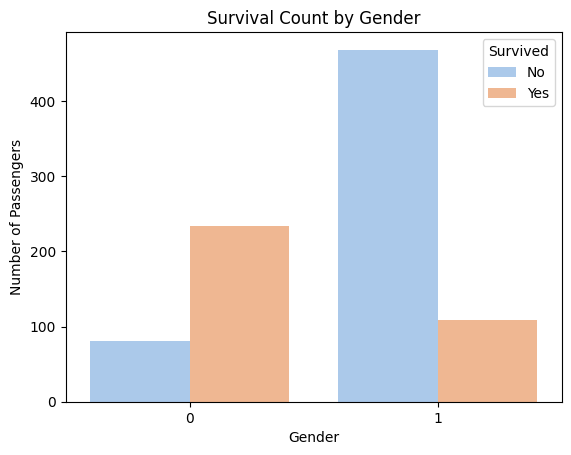

In [67]:
sns.countplot(x='Sex', hue='Survived', data=df, palette='pastel')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

#  Histogram – Age Distribution

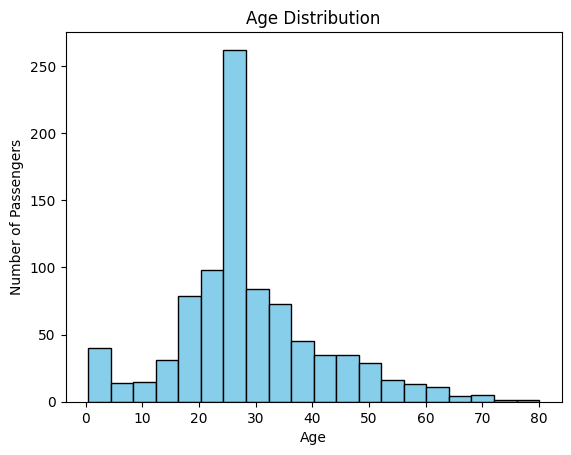

In [68]:
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

# Box Plot – Age vs Survival

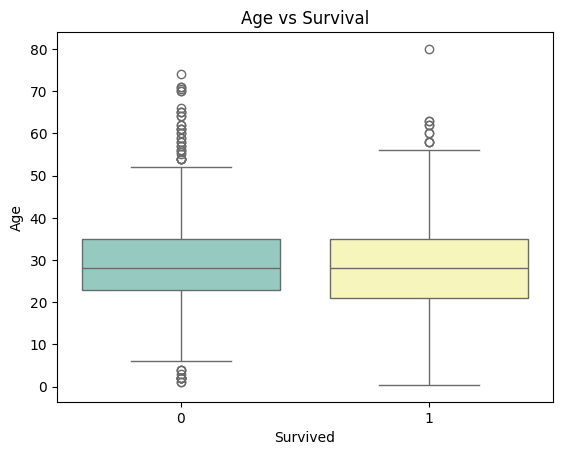

In [69]:
# Drop rows with missing 'Age' or 'Survived' values
df_clean = df.dropna(subset=['Age', 'Survived'])
# Optional: convert 'Survived' to string for clearer category labels
df_clean['Survived'] = df_clean['Survived'].astype(str)
sns.boxplot(x='Survived', y='Age', hue='Survived', data=df_clean, palette='Set3', dodge=False, legend=False)
plt.title('Age vs Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

# Passenger Survival Count by Gender

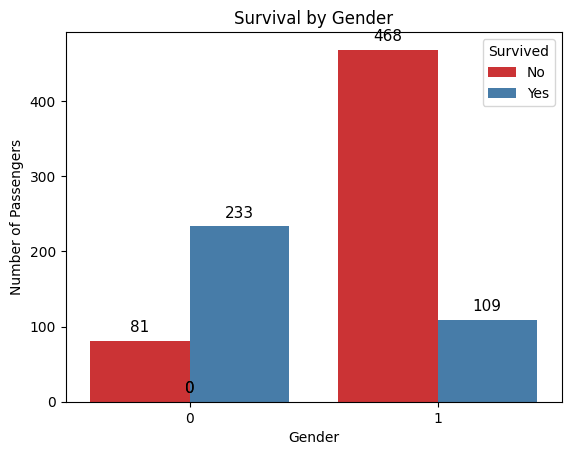

In [70]:
# Plot survival by Gender
ax = sns.countplot(x='Sex', hue='Survived', data=df, palette='Set1')
# Adding titles and labels
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
# Update legend labels
ax.legend(title='Survived', labels=['No', 'Yes'])  # 0 = No, 1 = Yes
# Add text annotations on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=11, color='black',
                xytext=(0, 4), textcoords='offset points')
# Display the plot
plt.show()


# Survival Distribution using pie chart

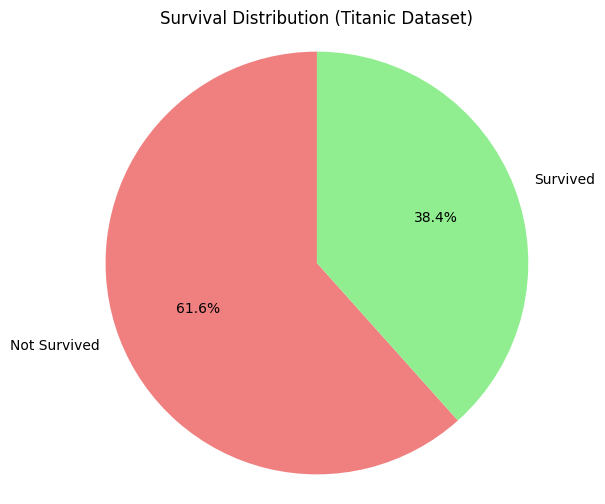

In [71]:
import matplotlib.pyplot as plt
# Count how many survived and how many did not survive
survival_counts = df['Survived'].value_counts()
# Labels for the pie chart
labels = ['Not Survived', 'Survived']
# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(survival_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Survival Distribution (Titanic Dataset)')
plt.axis('equal')
plt.show()


# 🧍 10. Predict for New Passenger
survived or not


In [72]:
new_passenger_data_yes = {
    'Pclass': [1.0],
    'Sex': [0],
    'Age': [30.0],
    'SibSp': [0.0],
    'Parch': [0.0],
    'Fare': [100.0],
    'Embarked': [2]
}
new_passenger_df_yes = pd.DataFrame(new_passenger_data_yes)
# Ensure the columns are in the same order as the training data features
# Get the column order from X_train
training_columns = X_train.columns
new_passenger_df_yes = new_passenger_df_yes[training_columns]
# Use the trained logistic regression model to predict survival
predicted_survival_yes = logistic_regression.predict(new_passenger_df_yes)
# Output the prediction
if predicted_survival_yes[0] == 1:
    print("Predicted Survival: Yes")
else:
    print("Predicted Survival: No")

Predicted Survival: Yes
